# Extract and analyse summary features

The clustered and projected data can be used to extract different features:

- size per cluster
- mean intensity per cluster
- TODO add more

The features are saved as an adata object.

In [1]:
from miann.tl import Experiment, FeatureExtractor
import os
from miann.pl import plot_mean_intensity, get_intensity_change, plot_intensity_change, plot_mean_size
import anndata as ad
from miann.pl import plot_co_occurrence, plot_co_occurrence_grid
import numpy as np
from miann.utils import init_logging
init_logging()

## Extract features
Features can be extracted with 
```
# intensity features
python extract_features.py test/CondVAE_pert-CC clustering_0.5 intensity
# spatial co-occurrence
python extract features.py test/CondVAE_pert-CC clustering_0.5 --co-logspace co-occurrence
```

TODO more infos of co-occ logspace 

In [2]:
exp = Experiment.from_dir('test/CondVAE_pert-CC')
# just use one dir here, for extracting all features, run the script
data_dir = exp.data_params['data_dirs'][0]
extr = FeatureExtractor(exp, data_dir=data_dir, cluster_name='clustering_0.5', 
                        cluster_dir='aggregated/sub-0.005')

INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC


In [19]:
# extract intensity features
extr.extract_intensity_size()

INFO:FeatureExtractor:Calculating clustering_0.5 (col: clustering_0.5) mean and size for 184A1_unperturbed/I09
INFO:MPPData:Created new: MPPData for NascentRNA (12132995 mpps with shape (1, 1, 35) from 886 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels'].
INFO:MPPData:Loaded data from 184A1_unperturbed/I09.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for NascentRNA (7218204 mpps with shape (1, 1, 34) from 557 objects). Data keys: ['clustering_0.5', 'y', 'x', 'obj_ids', 'latent', 'mpp'].
INFO:MPPData:Before subsetting: 886 objects
INFO:MPPData:Subsetting to 557 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent']
INFO:MPPData:Loaded data from 184A1_unperturbed/I09, with base data from 184A1_unperturbed/I09
INFO:MPPData:Restricted channels to 34 channels
INFO:MPPData:Subtracting channel-specific background value defined in column mean_background
INFO:MPPData:Rescaling MPP intensities per chan

In [5]:
# extract co-occurence scores: logspace from 2px to 80px
extr = FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features.h5ad'))
interval = np.logspace(np.log2(2),np.log2(80),10, base=2).astype(np.float32)
extr.extract_co_occurrence(interval)

INFO:FeatureExtractor:calculating co-occurrence for intervals [ 2.         3.0132604  4.539869   6.839904  10.305205  15.526134
 23.392141  35.24331   53.09863   80.       ] and clustering clustering_0.5 (col: clustering_0.5)
INFO:MPPData:Created new: MPPData for NascentRNA (12132995 mpps with shape (1, 1, 35) from 886 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels'].
INFO:MPPData:Loaded data from 184A1_unperturbed/I09.


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/aggregated/full_data/184A1_unperturbed/I09/clustering_0.5.npy


INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for NascentRNA (7218204 mpps with shape (1, 1, 35) from 557 objects). Data keys: ['x', 'y', 'clustering_0.5', 'obj_ids', 'latent', 'mpp'].
INFO:MPPData:Before subsetting: 886 objects
INFO:MPPData:Subsetting to 557 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent']
INFO:MPPData:Loaded data from 184A1_unperturbed/I09, with base data from 184A1_unperturbed/I09
INFO:MPPData:Restricted channels to 34 channels
INFO:MPPData:Subtracting channel-specific background value defined in column mean_background
INFO:MPPData:Rescaling MPP intensities per channels with predefined values
INFO:MPPData:Adding conditions: ['perturbation_duration_one_hot', 'cell_cycle_one_hot']
INFO:MPPData:Looking up condition perturbation_duration, with postprocess one_hot
INFO:convert_condition:Converting condition perturbation_duration to numbers
INFO:MPPData:Looking up condition cell_cycle,

preventing a NxN with N=25931 distance matrix to be created


INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (13697 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence for 248094, with shape (13697, 34)
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (11135 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence for 248096, with shape (11135, 34)
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (13562 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence 

preventing a NxN with N=24100 distance matrix to be created


INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (9078 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence for 256548, with shape (9078, 34)
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (18201 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence for 256550, with shape (18201, 34)
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (10249 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence fo

preventing a NxN with N=27780 distance matrix to be created


INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (14624 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence for 259776, with shape (14624, 34)
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (13989 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence for 259777, with shape (13989, 34)
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (13295 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence 

preventing a NxN with N=27090 distance matrix to be created


INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (12041 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence for 259789, with shape (12041, 34)
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (13628 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence for 259790, with shape (13628, 34)
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (11891 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence 

preventing a NxN with N=28894 distance matrix to be created


INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (16029 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence for 281062, with shape (16029, 34)
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (10401 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence for 281063, with shape (10401, 34)
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (14135 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence 

preventing a NxN with N=25172 distance matrix to be created


INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (13240 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence for 291046, with shape (13240, 34)
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (16999 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence for 291047, with shape (16999, 34)
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (18957 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence 

preventing a NxN with N=23764 distance matrix to be created


INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (14790 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence for 345900, with shape (14790, 34)
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (16798 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence for 345901, with shape (16798, 34)
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (15527 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence 

preventing a NxN with N=25844 distance matrix to be created


INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (8423 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence for 359181, with shape (8423, 34)
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (10936 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence for 359183, with shape (10936, 34)
INFO:MPPData:Before subsetting: 557 objects
INFO:MPPData:Subsetting to 1 objects
INFO:MPPData:Created new: MPPData for NascentRNA (13600 mpps with shape (1, 1, 34) from 1 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'clustering_0.5', 'latent', 'conditions'].
INFO:FeatureExtractor:co-occurrence fo

AttributeError: 'NoneType' object has no attribute 'obs'

# Explore extracted features

Features are stored in adata objects. Intensity info is stored as layers, co-occ scores as obsm matrices (obs x distances for each cluster-cluster pair)

In [3]:
# load data
exp = Experiment.from_dir('test/CondVAE_pert-CC')
extrs = [FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features.h5ad')) for data_dir in exp.data_params['data_dirs']]

extrs[0].adata

INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Cluster annotation: using cluster data in aggregated/sub-0.005
INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Cluster annotation: using cluster data in aggregated/sub-0.005
INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Cluster annotation: using cluster data in aggregated/sub-0.005
INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Cluster annotation: using cluster data in aggregated/sub-0.005


AnnData object with n_obs × n_vars = 557 × 34
    obs: 'mapobject_id', 'plate_name', 'well_name', 'well_pos_y', 'well_pos_x', 'tpoint', 'zplane', 'label', 'is_border', 'mapobject_id_cell', 'plate_name_cell', 'well_name_cell', 'well_pos_y_cell', 'well_pos_x_cell', 'tpoint_cell', 'zplane_cell', 'label_cell', 'is_border_cell', 'is_mitotic', 'is_mitotic_labels', 'is_polynuclei_HeLa', 'is_polynuclei_HeLa_labels', 'is_polynuclei_184A1', 'is_polynuclei_184A1_labels', 'is_SBF2_Sphase_labels', 'is_SBF2_Sphase', 'Heatmap-48', 'cell_cycle', 'description', 'dimensions', 'id', 'cell_type', 'EU', 'duration', 'perturbation', 'secondary_only', 'siRNA', 'perturbation_duration', 'LocalDensity_Nuclei_800', 'TR_factor', 'TR_norm', 'TR', 'TR_factor_DMSO-unperturbed', 'TR_norm_DMSO-unperturbed', 'obj_id_int'
    uns: 'clusters', 'co_occurrence_params', 'params'
    obsm: 'co_occurrence_0_0', 'co_occurrence_0_1', 'co_occurrence_0_2', 'co_occurrence_0_3', 'co_occurrence_0_4', 'co_occurrence_0_5', 'co_occurren

It is possible to extract a csv of intensity values and other metadata columns from this data.

In [4]:
for extr in extrs:
    extr.extract_intensity_csv(obs=['well_name', 'perturbation_duration', 'TR'])

### Intensity features

In [9]:
# get combined adata for dotplots
adatas = [extr.get_intensity_adata() for extr in extrs]
adata = ad.concat(adatas, index_unique='-')

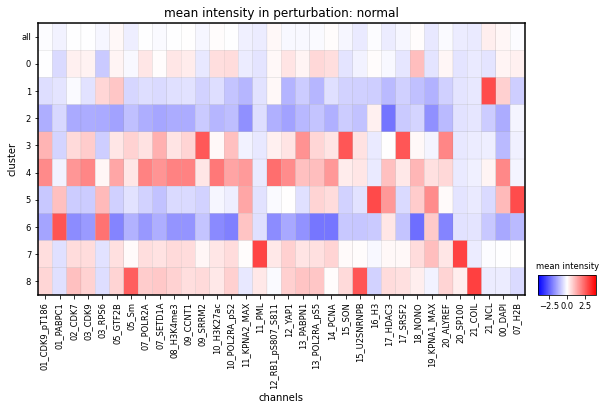

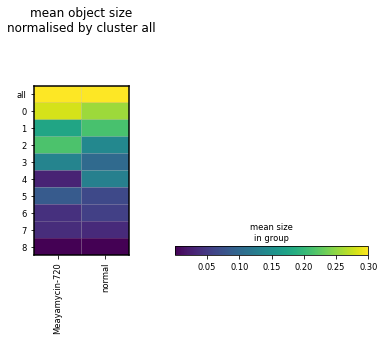

In [19]:
plot_mean_intensity(adata, groupby='cluster', limit_to_groups={'perturbation':'normal'}, dendrogram=False, layer=None, 
    standard_scale='var', cmap='bwr', vmin=-4, vmax=4)
plot_mean_size(adata, groupby_row='cluster', groupby_col='perturbation_duration', normby_row='all', vmax=0.3)

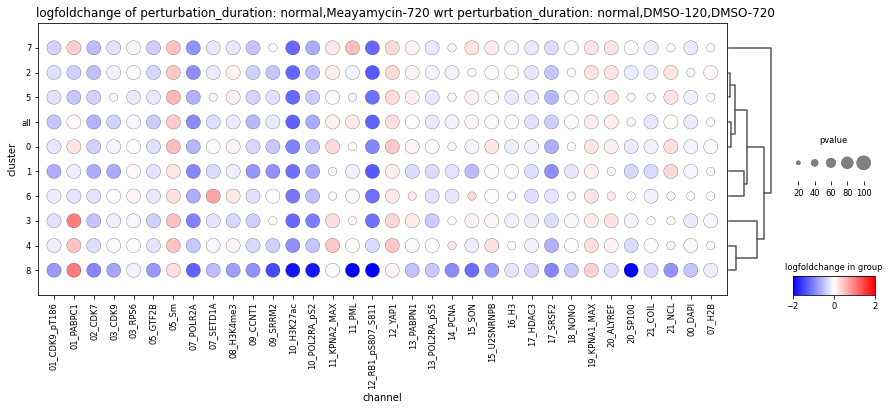

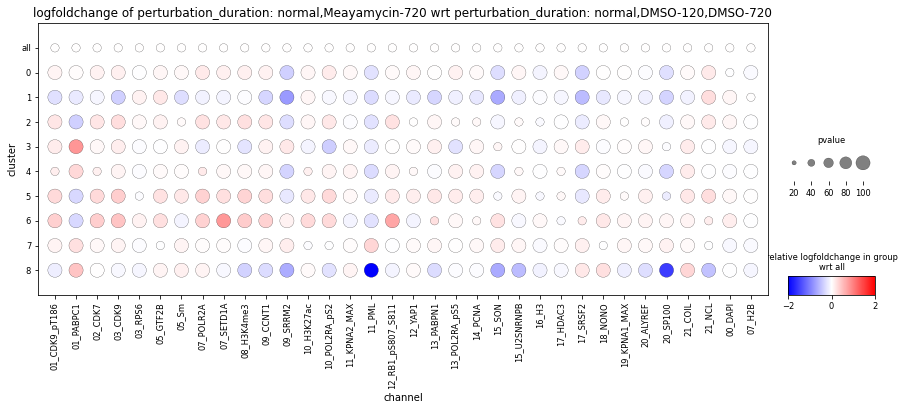

In [20]:
res = get_intensity_change(adata, groupby='cluster', reference_group='perturbation_duration', reference=['normal','DMSO-120', 'DMSO-720'], 
    limit_to_groups={'perturbation_duration': ['normal', 'Meayamycin-720']}, color='logfoldchange', size='pval')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2, dendrogram=True)

res = get_intensity_change(adata, groupby='cluster', reference_group='perturbation_duration', reference=['normal','DMSO-120', 'DMSO-720'], 
    limit_to_groups={'perturbation_duration': ['normal', 'Meayamycin-720']}, color='logfoldchange', size='pval', norm_by_group='all')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2)

### Co-occurrence scores

In [6]:
exp = Experiment.from_dir('test/CondVAE_pert-CC')
# load and concat all adatas
extrs = [FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features.h5ad')) for data_dir in exp.data_params['data_dirs']]

# get combined adata
adata = ad.concat([extr.adata for extr in extrs], index_unique='-', uns_merge='same')

INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Cluster annotation: using cluster data in aggregated/sub-0.005
INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Cluster annotation: using cluster data in aggregated/sub-0.005
INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Cluster annotation: using cluster data in aggregated/sub-0.005
INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Cluster annotation: using cluster data in aggregated/sub-0.005


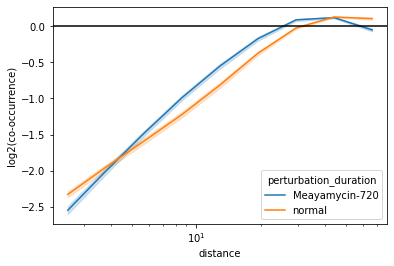

In [7]:
# plot meam co-occ scores
condition = 'perturbation_duration'
condition_values = None

# for one cluster-cluster pairing
plot_co_occurrence(adata, '0', '1', condition, condition_values)

In [8]:
# for all cluster pairings
fig, axes = plot_co_occurrence_grid(adata, condition, condition_values, legend=False, ci=95, figsize=(20,20))

# OLD: distance between mean scores

In [232]:
import ot
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

In [194]:
distances = (adata.uns['co_occurence_params']['interval'][:-1] + adata.uns['co_occurence_params']['interval'][1:]) / 2
M = squareform(pdist(distances[:,np.newaxis]))

In [195]:
def _co_occ_scores(adata, condition, condition_value, cluster1, cluster2, log=True):
    scores = adata[adata.obs[condition] == condition_value].obsm[f'co_occurence_{cluster1}_{cluster2}']
    # filter nans from scores (cells in which either cluster1 or cluster2 does not exist)
    scores = scores[~np.isnan(scores).all(axis=1)]
    # rename columns to center of distance interval
    distances = (adata.uns['co_occurence_params']['interval'][:-1] + adata.uns['co_occurence_params']['interval'][1:]) / 2
    scores = scores.rename(columns={str(i): d for i,d in enumerate(distances)})
    # get log2 of co-occ scores
    if log:
        scores = scores.apply(np.log2)
    # return scores ready to plot
    return scores.melt(value_name='score', var_name='distance')

calculate distance between mean scores / intensity values

In [227]:
# calculate co-occurence distances
condition = 'perturbation_duration'

adata.obs[condition] = adata.obs[condition].astype('category')
condition_values = adata.obs[condition].cat.categories

co_occ_dists = np.zeros((len(condition_values), len(condition_values)))
for i, v1 in enumerate(condition_values):
    for j, v2 in enumerate(condition_values):
        dists = []
        for c1 in adata.uns['clusters']:
            for c2 in adata.uns['clusters']:
                score_v1 = _co_occ_scores(adata, condition, v1, c1, c2, log=False).groupby('distance').mean()['score']
                score_v1 = score_v1 / score_v1.sum()
                score_v2 = _co_occ_scores(adata, condition, v2, c1, c2, log=False).groupby('distance').mean()['score']
                score_v2 = score_v2 / score_v2.sum()
                dists.append(ot.emd2(score_v1, score_v2, M=M))
        co_occ_dists[i,j] = np.mean(dists)

In [230]:
def _intensity_values(adata, condition, condition_value, cluster):
    return adata[adata.obs[condition] == condition_value].layers[f'intensity_{cluster}']

# calculate intensity distances
intensity_dists = np.zeros((len(condition_values), len(condition_values)))
for i, v1 in enumerate(condition_values):
    for j, v2 in enumerate(condition_values):
        dists = []
        for c in adata.uns['clusters']:
            val1 = _intensity_values(adata, condition, v1, c).mean(axis=0)
            val2 = _intensity_values(adata, condition, v2, c).mean(axis=0)
            dists.append(np.mean(np.abs(val1 - val2)))
        intensity_dists[i,j] = np.mean(dists)

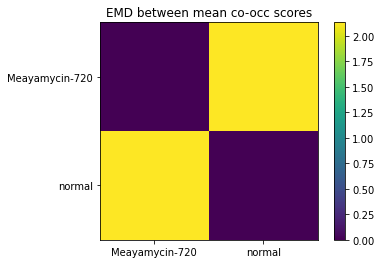

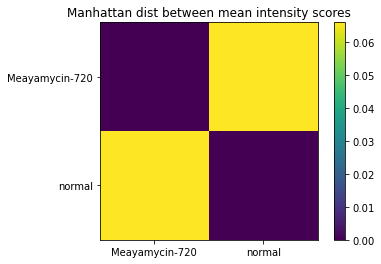

In [231]:
plt.imshow(co_occ_dists)
plt.xticks(range(len(condition_values)), labels=condition_values)
plt.yticks(range(len(condition_values)), labels=condition_values)
plt.title('EMD between mean co-occ scores')
plt.colorbar()

plt.figure()

plt.imshow(intensity_dists)
plt.xticks(range(len(condition_values)), labels=condition_values)
plt.yticks(range(len(condition_values)), labels=condition_values)
plt.title('Manhattan dist between mean intensity scores')
plt.colorbar()